In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
Coca=pd.read_csv('CocaCola_Sales_Rawdata.csv')
Coca

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
Coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


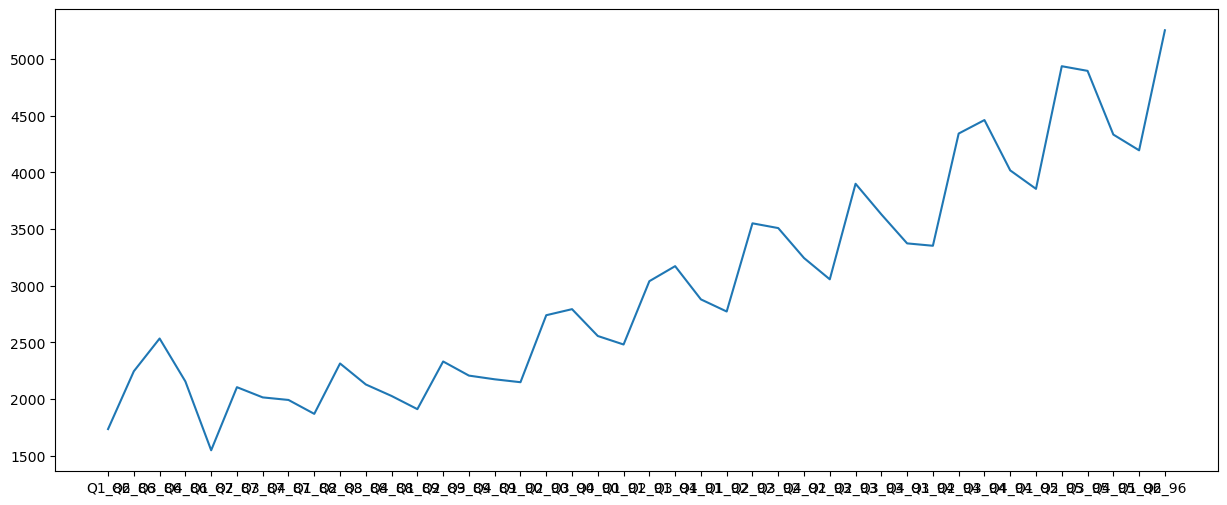

In [4]:
#Cocacola Sales plot()
plt.figure(figsize=(15,6))
plt.plot(Coca["Quarter"], Coca["Sales"])

In [5]:
#Splitting data into Train & Test
Train = Coca.head(30)
Test = Coca.tail(10)
Test.tail(10)

,Quarter,Sales
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


# Time series Decomposition Plot

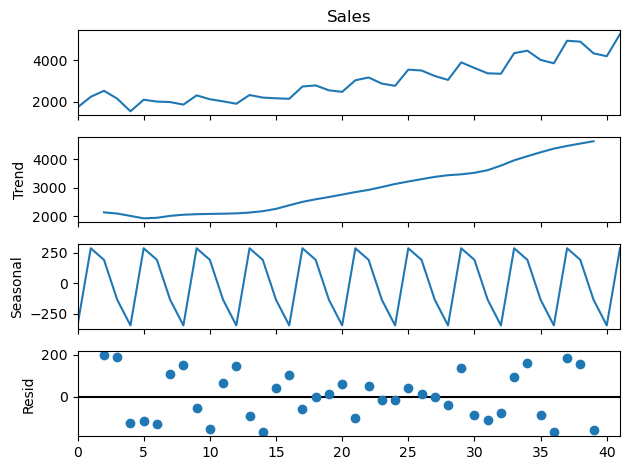

In [6]:
decompose_ts_add = seasonal_decompose(Coca.Sales,period= 4)
decompose_ts_add.plot()
plt.show()

# Defining MAPE

In [7]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [8]:
Test

,Quarter,Sales
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [9]:
ses_model = SimpleExpSmoothing(Coca["Sales"]).fit(smoothing_level=0.7)
pred_ses = pd.DataFrame()
pred_ses["Exp_Smoothing"] = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses["Exp_Smoothing"],Test.Sales) 
#pred_ses["Exp_Smoothing"]
#Test.Footfalls

C:\Users\pirfa\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


11.113543813692607

In [10]:
#The MAPE is 11% Hence the model is good

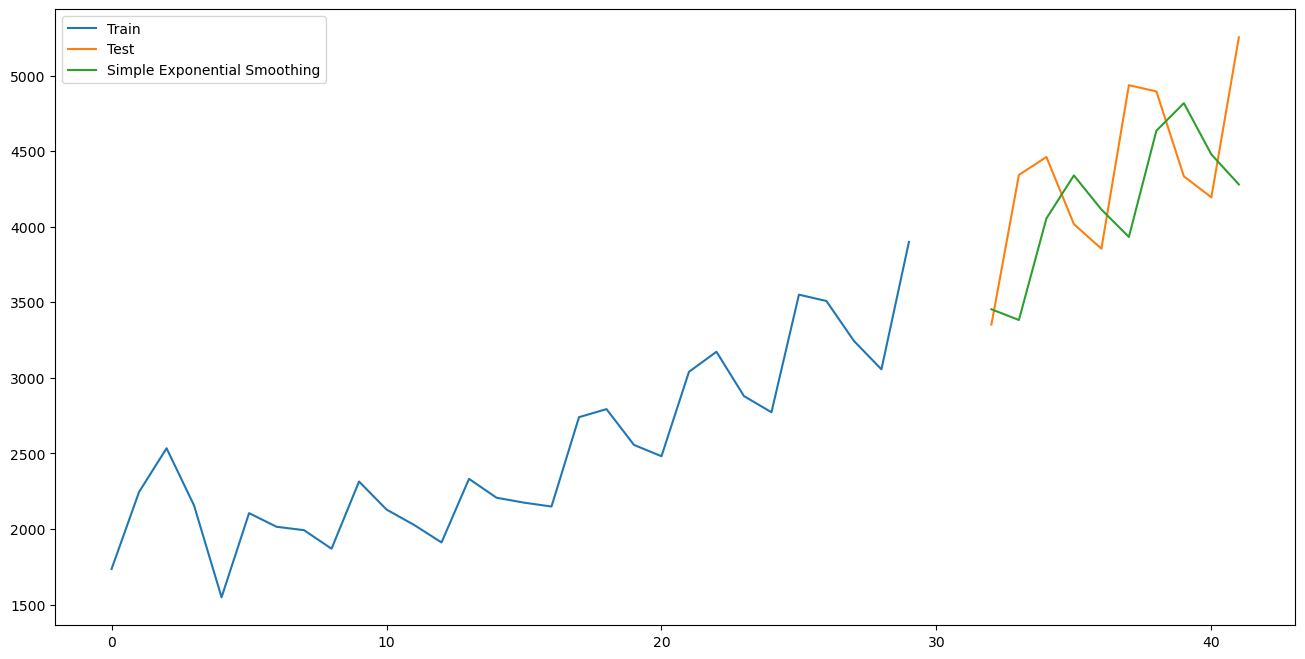

In [11]:
plt.figure(figsize=(16,8))
plt.plot(Train["Sales"], label='Train')
plt.plot(Test["Sales"], label='Test')
plt.plot(pred_ses["Exp_Smoothing"], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

# Final Model by combining train and test

In [12]:
hwe_model_add_add = ExponentialSmoothing(Coca.Sales,seasonal="add",trend="add",seasonal_periods=4).fit()

In [13]:
#Forecasting for next 10 Quarters
future_data = hwe_model_add_add.forecast(10)
future_data

42    5153.745833
43    4693.186058
44    4612.593863
45    5629.562074
46    5536.038032
47    5075.478257
48    4994.886062
49    6011.854273
50    5918.330231
51    5457.770456
dtype: float64